In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


Importing data and converting to a dataframe

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Checking for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can see that there are no missing values in any column. The datatypes seem ok. 

Checking for duplicated rows

In [6]:
df.duplicated().sum()

0

In [7]:
cx = df['Exited'].value_counts()[0]
cx_churned = df['Exited'].value_counts()[1]

In [8]:
print(f'Number of customers that are still with the bank: {cx}')

Number of customers that are still with the bank: 7963


In [9]:
print(f'Number of customers that have churned: {cx_churned}')

Number of customers that have churned: 2037


Data Exploration

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

We see that the gender is approximately equally split, however the bank customers are mostly from France.

Removing less useful features like 'RowNumber', 'CustomerId' & 'Surname'. 

In [12]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding categorical columns 

In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
X = df.drop(columns = ['Exited'])

y = df['Exited']

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
X #All input columns 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
y #All output columns 

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
X_train.shape

(8000, 11)

In [19]:
y_test.shape

(2000,)

Scaling the columns 

In [20]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

In [21]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

Now that the data pre-processing is complete we can install Tensorflow and Keras 

In [22]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

2024-08-07 22:17:57.166022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 22:17:57.166168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 22:17:57.321582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


We can make 2 types of models in keras -> sequential and non-sequential (functional API). Here we will make sequential models 

Here's a simple table comparing sequential and non-sequential models in Keras:

| Feature                     | Sequential Model                          | Non-Sequential Model (Functional API)         |
|-----------------------------|-------------------------------------------|-----------------------------------------------|
| **Definition**              | Linear stack of layers                    | Allows for more complex architectures         |
| **Ease of Use**             | Easy to use and understand                | Requires more understanding of model topology |
| **Flexibility**             | Limited to single input/output layers     | Supports multiple inputs/outputs, shared layers|
| **Layer Connection**        | Layers added in a sequence, one after another | Layers can be connected in arbitrary ways      |
| **Model Creation**          | Simple and straightforward                | More complex but powerful                     |
| **Suitable For**            | Simple models (e.g., feed-forward networks) | Complex models (e.g., multi-input/output, shared layers) |
| **API**                     | `Sequential` class                        | Functional API (using `Model` class)          |
| **Use Case Examples**       | Basic CNNs, simple MLPs                   | Inception networks, Residual networks, multi-task learning |
| **Code Example**            | ```Sequential([layer1, layer2, ...])```   | ```Model(inputs=[input1, input2], outputs=[output1, output2])``` |
| **Graph Representation**    | Straightforward, linear graph             | Complex, directed acyclic graph               |

This table highlights the key differences between sequential and non-sequential models in Keras, helping you choose the appropriate model type based on your specific needs and the complexity of your architecture. 

Source: ChatGPT


In [23]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 11))

model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Summary of the model

In [24]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [26]:
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1444
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8384
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6739
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5833
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5273
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4983
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4754
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4717
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4590
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4529


Now so far we have calculated all our models weights and biases. 

In [27]:
model.layers[0].get_weights()

[array([[-1.01512729e-03, -7.82555044e-02,  1.09486021e-02],
        [ 9.38300312e-01,  1.03872395e+00, -1.81486332e+00],
        [ 3.93191874e-02, -2.27268279e-01, -1.05827348e-02],
        [ 1.77742481e-01,  2.88032562e-01, -4.60925788e-01],
        [-4.31402698e-02, -1.58010960e-01, -6.07011579e-02],
        [-1.56061694e-01, -2.03836963e-01, -1.31294802e-01],
        [-9.84364033e-01, -3.41899097e-01,  5.10390341e-01],
        [ 3.10550332e-01, -1.50091380e-01,  8.38225111e-02],
        [ 7.29457498e-01,  4.63743567e-01, -4.82962638e-01],
        [-9.94849652e-02, -1.17769735e-02,  4.42762189e-02],
        [-3.88727367e-01, -1.37904570e-01,  4.73680943e-01]], dtype=float32),
 array([-0.7350682, -0.6805761,  0.5927308], dtype=float32)]

In [30]:
y_log = model.predict(X_test_scaled) #Here the output isn't 0 or 1. As we are using a Sigmoid function the output of the sigmoid function is between 0 and 1 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


If the value is less than 0.5 then we say 0, else 1

In [35]:
y_pred = np.where(y_log > 0.5, 1 , 0)

In [36]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.7925

So far our accuracy is 79.25%. By making some changes in our neural network we can improve our accuracy. These changes include: 
1. Increasing the number of epochs
2. Change activation function from sigmoid to ReLU for better results 
3. Increase the number of nodes of the hidden layers 
4. Increase the number of hidden layers for better accuracy. However adding too many layers causes overfitting.


In [ ]:
model.fit(X_train_scaled, y_train, epochs = 10)

In [37]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [56]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3236 - val_accuracy: 0.8494 - val_loss: 0.3538
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3110 - val_accuracy: 0.8500 - val_loss: 0.3537
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3045 - val_accuracy: 0.8500 - val_loss: 0.3539
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3160 - val_accuracy: 0.8487 - val_loss: 0.3537
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3173 - val_accuracy: 0.8462 - val_loss: 0.3536
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3151 - val_accuracy: 0.8481 - val_loss: 0.3545
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.3115 - val_accuracy: 0.8512 - val_loss: 0.3535
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.3038 - val_accu

There seems to be some amount of overfitting here as the training accuracy is more than the validation accuracy. 

For the 0th layer

In [44]:
model.layers[0].get_weights()

[array([[ 1.16088279e-01, -3.15081142e-02, -1.70772702e-01,
         -1.96331784e-01,  2.73560584e-01, -1.42019108e-01,
         -1.85451090e-01,  6.43440425e-01, -1.92937478e-01,
         -3.46140295e-01, -1.89805776e-02],
        [ 6.08557343e-01,  6.79614365e-01,  2.97101915e-01,
          1.68621272e-01,  6.82604387e-02,  7.20700920e-02,
          5.20749509e-01,  2.69178182e-01,  4.52021927e-01,
         -5.17117202e-01, -7.74932504e-01],
        [ 7.71540031e-02,  7.02784359e-01, -3.91585052e-01,
         -1.14059600e-03, -9.77946445e-02,  1.13627613e-01,
          3.53777021e-01,  6.74754739e-01,  3.82918268e-02,
          8.05684924e-02,  9.78139117e-02],
        [ 5.35368957e-02, -6.64048851e-01,  3.53666484e-01,
          5.71850598e-01, -4.61475283e-01, -4.42310810e-01,
          8.10096860e-02,  3.90085012e-01, -4.76497918e-01,
          1.43536747e-01, -1.00699596e-01],
        [-1.13798223e-01,  1.09600469e-01,  4.36937734e-02,
          5.52097797e-01, -1.11707464e-01,  

For the 1st layer 

In [45]:
model.layers[1].get_weights()

[array([[-0.30207357, -0.26210383,  0.46058777,  0.01794954, -0.6059106 ,
         -0.48499426,  0.6803263 ,  0.0022846 , -0.12806475, -0.3631965 ,
         -0.08886785],
        [-0.5206789 , -0.0400487 ,  0.6466297 , -0.35655105, -0.13115138,
          0.92024577,  0.6611201 , -0.8167913 ,  0.10798725, -0.0405249 ,
          0.28841728],
        [ 0.47016767,  0.14743993, -0.0302349 , -0.11657877,  0.11640098,
         -0.07485405,  0.56895864,  0.24700679,  0.16456862,  0.14403895,
          0.3446776 ],
        [ 0.14936145,  0.10930709, -0.3624773 , -0.53466153,  0.5388321 ,
         -0.12002511, -0.3133101 ,  0.20498161,  0.61406064, -0.49018526,
          0.824618  ],
        [ 0.47477606,  0.30892745,  0.21347599,  0.28032777,  0.3374808 ,
          0.35200042,  0.0031389 , -0.118301  , -0.2369463 ,  0.5822797 ,
          0.76995414],
        [ 0.2645845 ,  0.12031479, -0.17376707,  0.11612457, -2.1991866 ,
         -0.48976868,  0.5156784 ,  0.71230036,  0.9509936 ,  0.2735530

In [46]:
model.layers[2].get_weights()

[array([[ 0.37187225],
        [-1.1038036 ],
        [-0.2310674 ],
        [-0.80212396],
        [ 1.4707226 ],
        [ 1.1045159 ],
        [-0.81527907],
        [ 1.318544  ],
        [ 1.5031575 ],
        [-0.28471524],
        [-0.33892623]], dtype=float32),
 array([-0.03495247], dtype=float32)]

In [48]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
y_pred = np.where(y_log > 0.5, 1 , 0)

In [50]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.863

Here we see the accuracy has improved to 86.3% 

Vizualization 

In [52]:
import matplotlib.pyplot as plt 

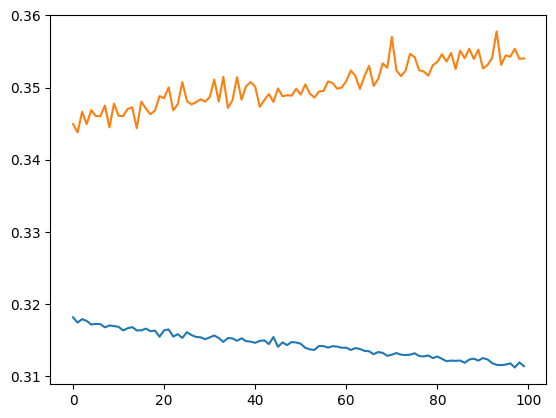

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

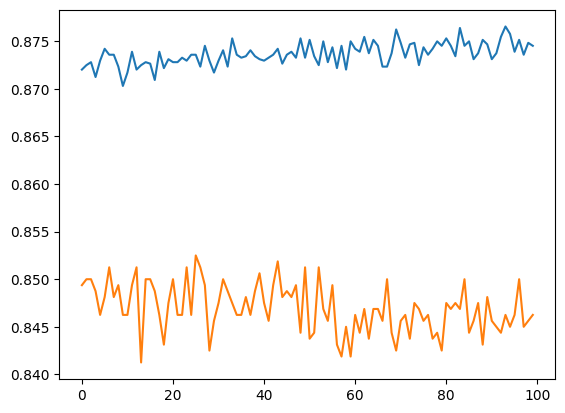

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

There is a gap which indicates overfitting. 